
# **Qubits, the Bloch Sphere, and Basis States**
##**Installs and Imports**

We will need to install Qiskit, IBM's quantum computing language. Then we will need to import qiskits tools for creating Bloch sphere representations of qubits.


In [2]:
!pip3 install qiskit
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

# **Qubits, the Bloch Sphere, and Basis States**

Qubits are the basic unit of computation in a quantum computer, much like bits are the basic unit of computation in a "classical" computer. In bit based computing we have silicon chips with transistors which serve as "on/off" switches that serve as building blocks for complex systems of logic gates implementing Boolean logic. In a quantum computer, these "on/off" bits represented by strings of 0s and 1s are replaced by **qubits**. Qubits behave much differently from classical bits, but any classical computation involving bits can still be implemented on a quantum system of qubits. However, much more can be done with qubits. They provide computational abilities that bits, classical computing, and classical information processing simply cannot replicate or accurately simulate. In some cases there are quantum information processes which provide a new paradigm for understanding information theory and computational complexity. Here we will focus on the basics and leave quantum complexity and subjects like entanglement entropy for the part on **tensor networks**.

Qubits have many representations, the most common of them being as a
$2$-dimensional complex unit vector:

$$\vert\psi\rangle=\begin{pmatrix}
           α \\
           β \\
\end{pmatrix}, $$
where
$\sqrt{\langleψ\vertψ⟩}=1,$

From the condition that the vector be of length one, we can deduce the following:

$\sqrt{\langleψ\vertψ⟩}=\sqrt{(α^*,β^*)\begin{pmatrix}
           α \\
           β \\
\end{pmatrix}} = \sqrt{\alpha^*α+β^*β}=\sqrt{\lvertα\rvert^2+\lvert\beta\rvert^2}=1 => \lvertα\rvert^2+\lvert\beta\rvert^2=1.$

Remember, α and β
 are complex numbers (elements of $\mathbb{C}$), and so the vector $\vert\psi\rangle$∈$\mathbb{C}^2$. The vectors representing qubit **[pure states](https://en.wikipedia.org/wiki/Quantum_state#Pure_states)** actually live on the **Riemann sphere** also called the **[complex projective line](https://en.wikipedia.org/wiki/Riemann_sphere#As_the_complex_projective_line)** $\mathbb{P}^1(\mathbb{C})$.


The second representation, which comes from the representation of pure states as points on the Riemann sphere and that is very common in the literature and in software packages for quantum computing is via the Bloch sphere, named after the Nobel laureate and physicist Felix Bloch. Generally, the north pole represents the basis state

$$\vert0\rangle=\begin{pmatrix}
           1 \\
           0 \\
\end{pmatrix}
$$

We can visualize this in Qiskit as follows:




        

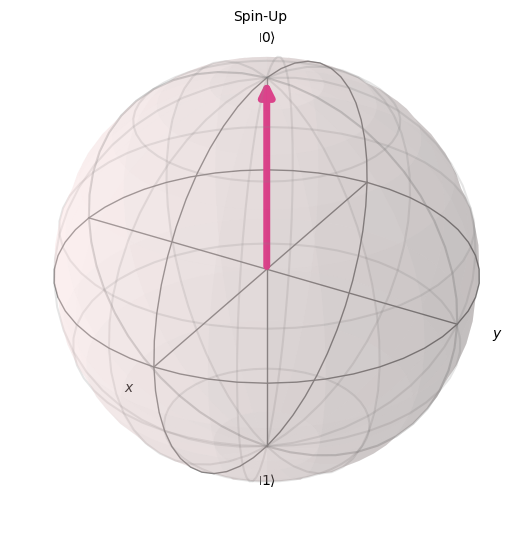

In [4]:
plot_bloch_vector([0,0,1], title="Spin-Up")

#**Pauli Basis States**
In general we have the following six basis states in terms of the "**Puali matrices**" which we will define later.

##**Spin-up/Spin-down (z-axis)**


$$spin-up: \vert0\rangle=\begin{pmatrix}
           1 \\
           0 \\
\end{pmatrix}
$$


$$spin-down: \vert1\rangle=\begin{pmatrix}
           0 \\
           1 \\
\end{pmatrix}
$$


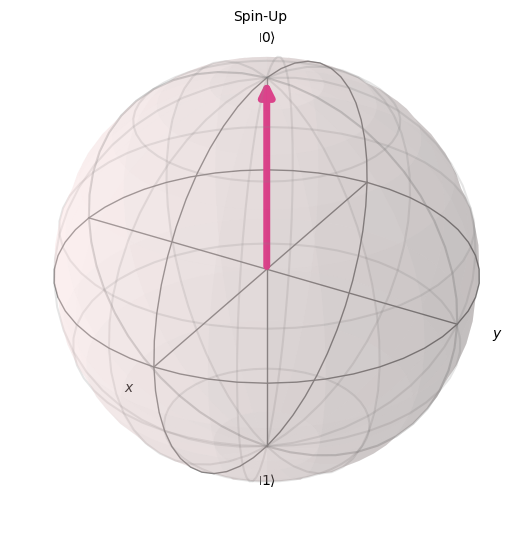

In [5]:
plot_bloch_vector([0,0,1], title="Spin-Up")

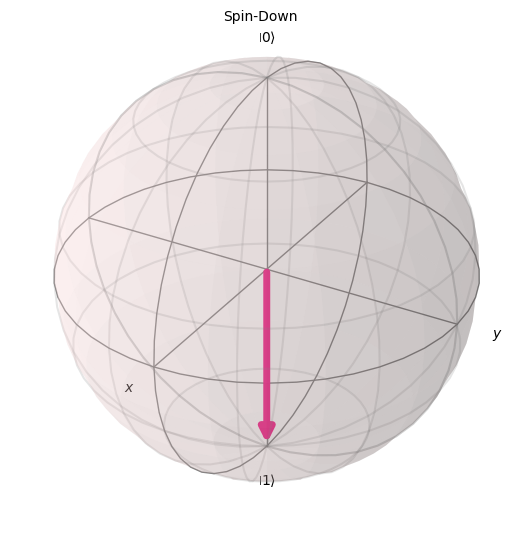

In [6]:
plot_bloch_vector([0,0,-1], title="Spin-Down")

##**Spin-right/Spin-left (x-axis)**



$$spin-right: \vert r\rangle=\begin{pmatrix}
           1/\sqrt{2} \\
           i/\sqrt{2} \\
\end{pmatrix}=\frac{1}{\sqrt{2}}(\vert 0\rangle+i\vert 1\rangle)
$$


$$spin-left: \vert l\rangle=\begin{pmatrix}
           1/\sqrt{2} \\
           -i/\sqrt{2} \\
\end{pmatrix}=\frac{1}{\sqrt{2}}(\vert 0\rangle-i\vert 1\rangle)
$$

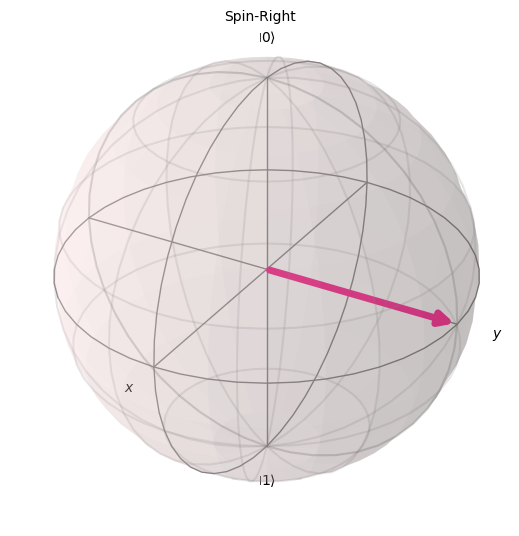

In [7]:
plot_bloch_vector([0,1,0], title="Spin-Right")

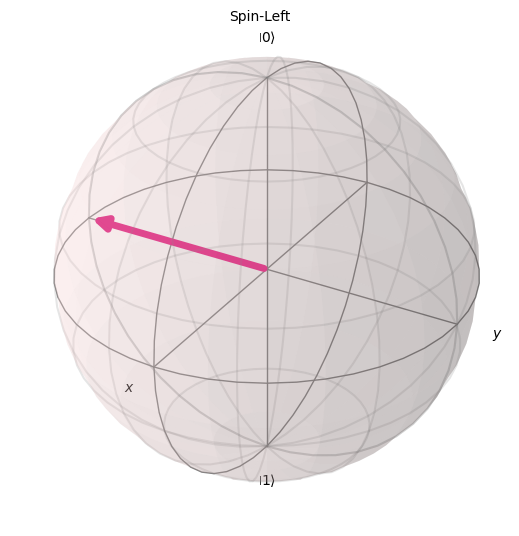

In [8]:
plot_bloch_vector([0,-1,0], title="Spin-Left")

##**Spin +/Spin - (y-axis)**


$$spin +: \vert +\rangle=\begin{pmatrix}
           1/\sqrt{2} \\
           1/\sqrt{2} \\
\end{pmatrix}=\frac{1}{\sqrt{2}}(\vert 0\rangle+\vert 1\rangle)
$$


$$spin -: \vert -\rangle=\begin{pmatrix}
           1/\sqrt{2} \\
           -1/\sqrt{2} \\
\end{pmatrix}=\frac{1}{\sqrt{2}}(\vert 0\rangle-\vert 1\rangle)
$$

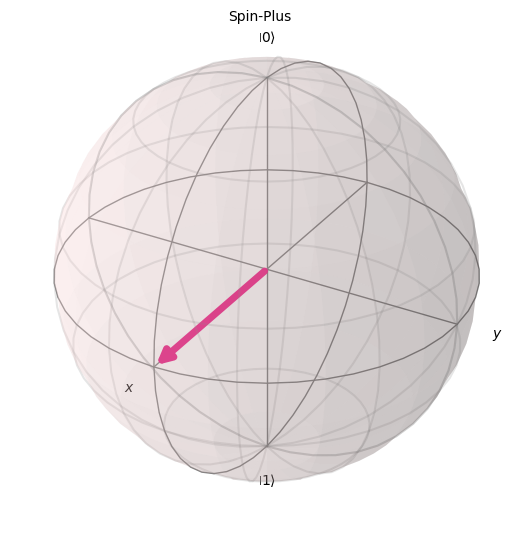

In [9]:
plot_bloch_vector([1,0,0], title="Spin-Plus")

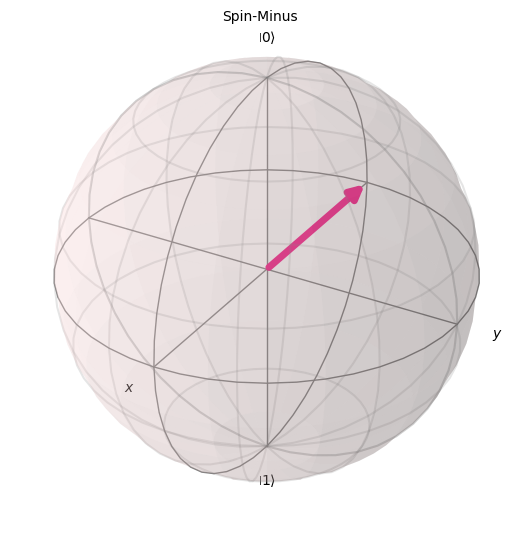

In [10]:
plot_bloch_vector([-1,0,0], title="Spin-Minus")

##**Arbitrary State Vectors**
If we want to define an arbitrary state vector on the Bloch sphere we simply need to define a unit vector in
$3$-dimensional space as the input state. To do this, define any
$3$-dimensional vector, then divide it by its length (or norm). This will give a vector of length one, which can then be used as an input for Qiskit to plot on the Bloch sphere.

An arbitrary pure state can be represented as some linear combination:


$$\vert ψ\rangle=\begin{pmatrix}
           α \\
           β \\
\end{pmatrix}=α\vert 0\rangle+β\vert 1\rangle
$$

where $\lvertα\rvert^2+\lvert\beta\rvert^2=1$

In [11]:
# Define a 3-dimensional vector
vect = np.array([1, -1, 1])

# Divide it by its length (or norm)
psi = vect/(np.linalg.norm(vect))
print(psi)

[ 0.57735027 -0.57735027  0.57735027]


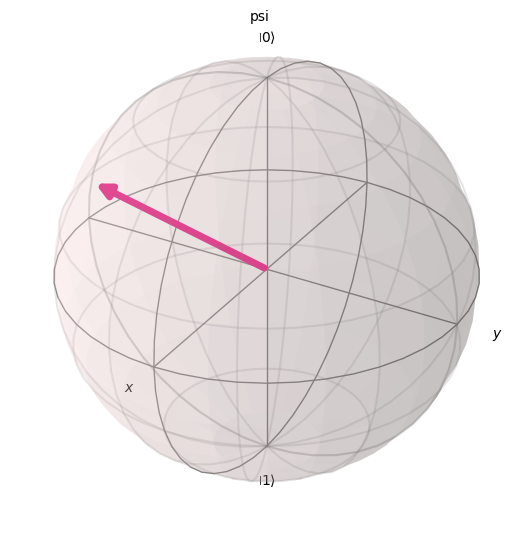

In [12]:
# Plot psi on the Bloch sphere using Qiskit
plot_bloch_vector(psi, title="psi")

We could also use spherical coordinates to define a unit vector that always lies on the surface of the unit sphere in $3$
-dimensions, which is the Bloch sphere. To do this, we choose $ρ=1$, and then choose two angles $θ ∈[0, π]$ and $ϕ ∈[0, 2π]$
. The $x,$ $y$ and $z$ coordinates are then:


$$x = ρsin(θ)cos(ϕ)$$

$$y = ρsin(θ)sin(ϕ)$$

$$z = ρcos(θ)$$

\\
Let do an example with θ=0 and ϕ=0. This should correspond to spin-up since we get

$$x = 0$$

$$y = 0$$

$$z = 1$$


In [13]:
x = np.sin(0)*np.cos(0)
y = np.sin(0)*np.sin(0)
z = np.cos(0)

psi1 = np.array([x, y, z])
print("x=", x)
print("y=", y)
print("z=", z)
print("psi1=", psi1)

x= 0.0
y= 0.0
z= 1.0
psi1= [0. 0. 1.]


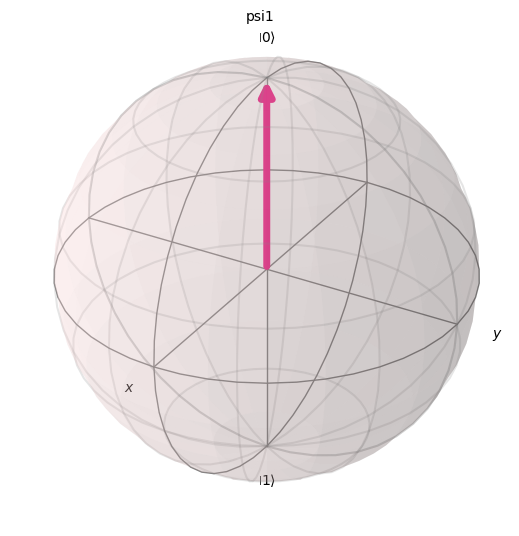

In [14]:
# Plot psi on the Bloch sphere using Qiskit
plot_bloch_vector(psi1, title="psi1")

Now use spherical coordinates to create the spin-down state now.

In [15]:
### TO DO ####
import math

theta_d = math.radians(180)
phi_d = 0

x_d = np.sin(theta_d)*np.cos(phi_d)
y_d = np.sin(theta_d)*np.sin(phi_d)
z_d = np.cos(theta_d)


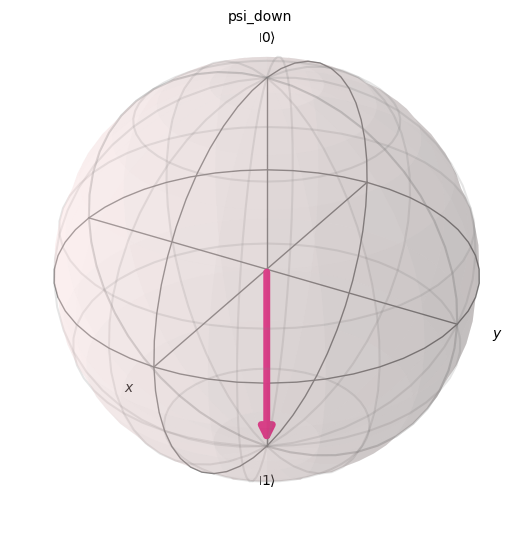

In [16]:
# Plot psi on the Bloch sphere using Qiskit
### TO DO ###

plot_bloch_vector(np.array([x_d, y_d, z_d]), title="psi_down")

Use spherical coordinates to create the spin right, spin left, spin plus, and spin minus states.

In [17]:
### TO DO ####

theta_r = math.radians(90)
phi_r = math.radians(90)

x_r = np.sin(theta_r)*np.cos(phi_r)
y_r = np.sin(theta_r)*np.sin(phi_r)
z_r = np.cos(theta_r)

theta_l = math.radians(90)
phi_l = math.radians(-90)

x_l = np.sin(theta_l)*np.cos(phi_l)
y_l = np.sin(theta_l)*np.sin(phi_l)
z_l = np.cos(theta_l)

theta_plus = math.radians(90)
phi_plus = math.radians(0)

x_plus = np.sin(theta_plus)*np.cos(phi_plus)
y_plus = np.sin(theta_plus)*np.sin(phi_plus)
z_plus = np.cos(theta_plus)

theta_minus = math.radians(-90)
phi_minus = math.radians(0)

x_minus = np.sin(theta_minus)*np.cos(phi_minus)
y_minus = np.sin(theta_minus)*np.sin(phi_minus)
z_minus = np.cos(theta_minus)

[np.float64(6.123233995736766e-17), np.float64(1.0), np.float64(6.123233995736766e-17)]


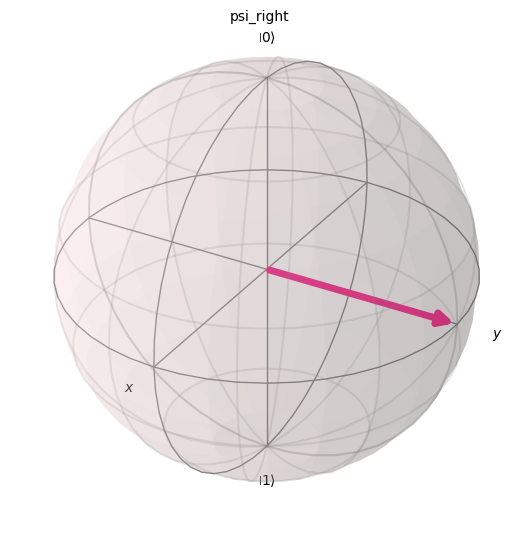

In [18]:
# Plot psi for each of the above states on the Bloch sphere using Qiskit
### TO DO ###
print([x_r, y_r, z_r])
plot_bloch_vector(np.array([x_r, y_r, z_r]), title="psi_right")

[np.float64(6.123233995736766e-17), np.float64(-1.0), np.float64(6.123233995736766e-17)]


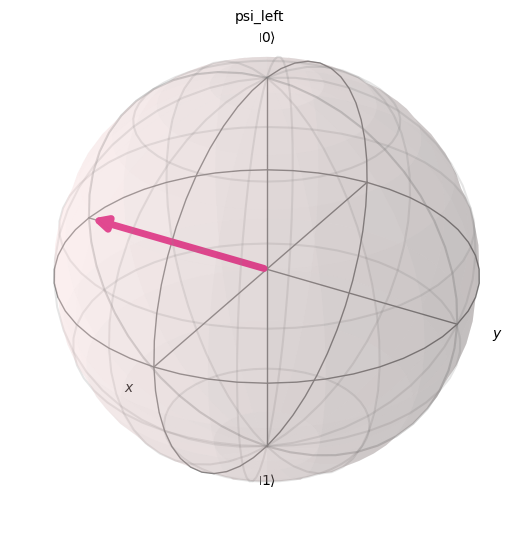

In [19]:
print([x_l, y_l, z_l])
plot_bloch_vector(np.array([x_l, y_l, z_l]), title="psi_left")

[np.float64(1.0), np.float64(0.0), np.float64(6.123233995736766e-17)]


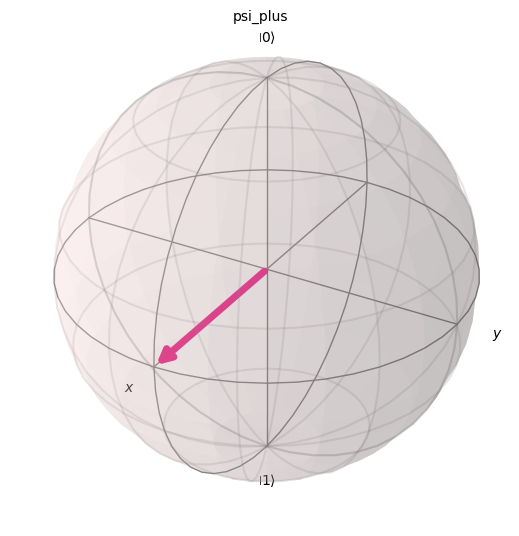

In [20]:
print([x_plus, y_plus, z_plus])
plot_bloch_vector(np.array([x_plus, y_plus, z_plus]), title="psi_plus")

[np.float64(-1.0), np.float64(-0.0), np.float64(6.123233995736766e-17)]


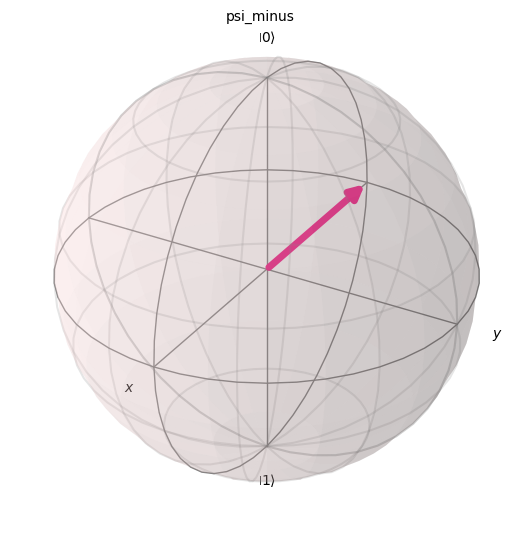

In [21]:
print([x_minus, y_minus, z_minus])
plot_bloch_vector(np.array([x_minus, y_minus, z_minus]), title="psi_minus")

Let's define the six basis states in Python and compute some things with them.

In [22]:
spin_up = np.matrix([[1],
                       [0]])

spin_down = np.matrix([[0],
                     [1]])

spin_right = (1/np.sqrt(2))*(spin_up + 1j*spin_down)

spin_left = (1/np.sqrt(2))*(spin_up - 1j*spin_down)

spin_plus = (1/np.sqrt(2))*(spin_up + spin_down)

spin_minus = (1/np.sqrt(2))*(spin_up - spin_down)

print('spin up:', spin_up)
print('spin down:', spin_down)
print('spin right:', spin_right)
print('spin left:', spin_left)
print('spin plus:', spin_plus)
print('spin minus:', spin_minus)

spin up: [[1]
 [0]]
spin down: [[0]
 [1]]
spin right: [[0.70710678+0.j        ]
 [0.        +0.70710678j]]
spin left: [[0.70710678+0.j        ]
 [0.        -0.70710678j]]
spin plus: [[0.70710678]
 [0.70710678]]
spin minus: [[ 0.70710678]
 [-0.70710678]]


In [23]:
np.dot(spin_down.H, spin_down)

matrix([[1]])

In [24]:
np.dot(spin_left.H, spin_right)

matrix([[0.+0.j]])

##**Exercises**
Compute the following inner products.



1.   $\langle 0\vert 1⟩$
2.   $\langle 1\vert 0⟩$
3.   $\langle 1\vert 1⟩$
4.   $\langle r\vert l⟩$
5.   $\langle l\vert r⟩$
6.   $\langle r\vert r⟩$
7.   $\langle l\vert l⟩$
8.   $\langle +\vert -⟩$
9.   $\langle +\vert r⟩$
10.   $\langle -\vert l⟩$
11.   $\langle 0\vert r⟩$
12.   $\langle l\vert 1⟩$
13.   $\langle 0\vert +⟩$
14.   $\langle -\vert -⟩$
15.   $\langle -\vert r⟩$

Plot the following states on the Bloch sphere using Qiskit for the given angles
θ and ϕ.

16.   $θ = π/2, ϕ = -π/3$
17.   $θ = -π/4, ϕ = -π/6$
18.   $θ = -π/2, ϕ = π/4$
19.   $θ = π/3, ϕ = -π$
20.   $θ = -π/6, ϕ = -π/4$











In [25]:
print("1", np.dot(spin_up.H, spin_down))
print("2", np.dot(spin_down.H, spin_up))
print("3", np.dot(spin_down.H, spin_down))
print("4", np.dot(spin_right.H, spin_left))
print("5", np.dot(spin_left.H, spin_right))
print("6", np.dot(spin_right.H, spin_right))
print("7", np.dot(spin_left.H, spin_left))
print("8", np.dot(spin_plus.H, spin_minus))
print("9", np.dot(spin_plus.H, spin_right))
print("10", np.dot(spin_minus.H, spin_left))
print("11", np.dot(spin_up.H, spin_right))
print("12", np.dot(spin_left.H, spin_down))
print("13", np.dot(spin_up.H, spin_plus))
print("14", np.dot(spin_minus.H, spin_minus))
print("15", np.dot(spin_minus.H, spin_right))

1 [[0]]
2 [[0]]
3 [[1]]
4 [[0.+0.j]]
5 [[0.+0.j]]
6 [[1.+0.j]]
7 [[1.+0.j]]
8 [[0.]]
9 [[0.5+0.5j]]
10 [[0.5+0.5j]]
11 [[0.70710678+0.j]]
12 [[0.+0.70710678j]]
13 [[0.70710678]]
14 [[1.]]
15 [[0.5-0.5j]]


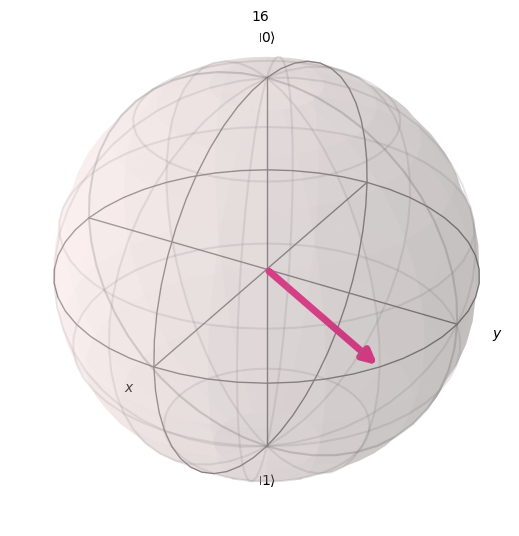

In [26]:
def get_coordinates(theta, phi):
    x_minus = np.sin(theta)*np.cos(phi)
    y_minus = np.sin(theta)*np.sin(phi)
    z_minus = np.cos(theta)

    return np.array([x_minus, y_minus, z_minus])

plot_bloch_vector(get_coordinates(math.pi/2, math.pi/3), title="16")



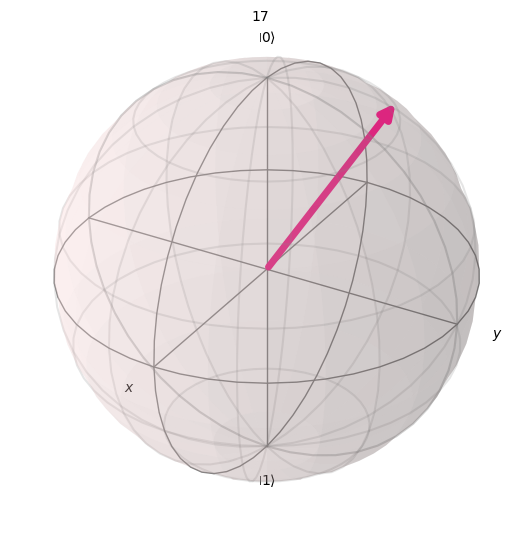

In [27]:
plot_bloch_vector(get_coordinates(-1* math.pi/4, -1 * math.pi/6), title="17")


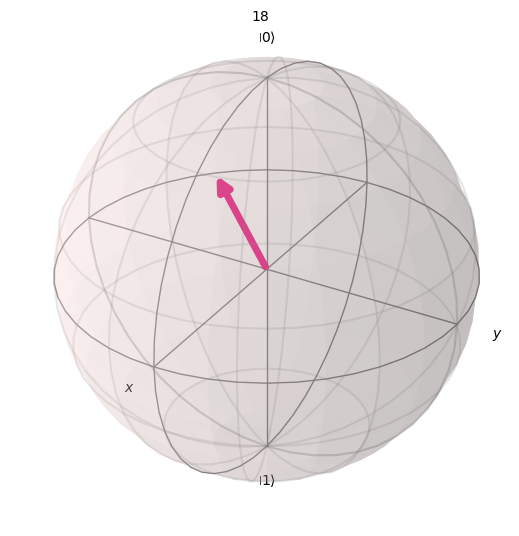

In [28]:
plot_bloch_vector(get_coordinates(-1* math.pi/2, math.pi/4), title="18")


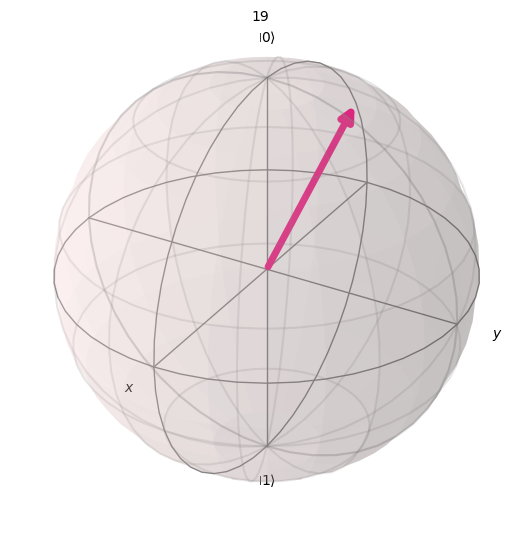

In [31]:
plot_bloch_vector(get_coordinates(math.pi/3, -1 * math.pi), title="19")


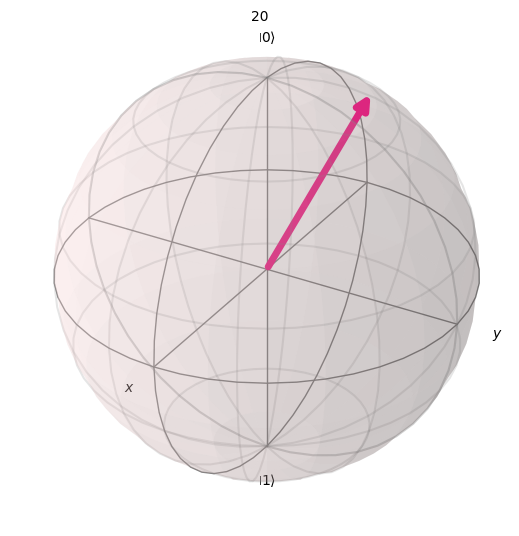

In [30]:

plot_bloch_vector(get_coordinates(-1 * math.pi/6, -1 * math.pi/4), title="20")